In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

In [2]:
data = pd.read_csv("met_data.csv")

In [3]:
data

,DATE,RAINFALL (mm),Max Temp (°C),Min Temp (°C),Mean Temp (°C),Soil Temp @ 50cm (°C),Sunshine Hours,Evaporation (mm)
0,2014-01-01,NaN,34.0,23.0,28.5,30.50,7.20,4.00
1,2014-01-02,NaN,35.0,24.0,29.5,30.00,6.60,4.00
2,2014-01-03,NaN,32.0,23.0,27.5,30.50,7.20,6.00
3,2014-01-04,NaN,33.0,21.0,27.0,30.50,6.10,4.00
4,2014-01-05,NaN,31.5,22.0,26.8,30.50,7.30,4.00
...,...,...,...,...,...,...,...,...
3647,2023-12-27,NaN,30.0,21.0,25.5,NaN,4.20,3.40
3648,2023-12-28,NaN,31.0,22.0,26.5,NaN,5.50,4.10
3649,2023-12-29,NaN,32.0,22.0,27.0,NaN,5.70,3.80
3650,2023-12-30,NaN,32.0,21.0,26.5,NaN,4.10,3.20


In [4]:
if 'DATE' in data.columns:
    data['DATE'] = pd.to_datetime(data['DATE'], format="%Y-%m-%d")


In [5]:
if 'DATE' in data.columns:
    data['year'] = data['DATE'].dt.year
    data['month'] = data['DATE'].dt.month
    data['day'] = data['DATE'].dt.day

In [6]:
data

,DATE,RAINFALL (mm),Max Temp (°C),Min Temp (°C),Mean Temp (°C),Soil Temp @ 50cm (°C),Sunshine Hours,Evaporation (mm),year,month,day
0,2014-01-01,NaN,34.0,23.0,28.5,30.50,7.20,4.00,2014,1,1
1,2014-01-02,NaN,35.0,24.0,29.5,30.00,6.60,4.00,2014,1,2
2,2014-01-03,NaN,32.0,23.0,27.5,30.50,7.20,6.00,2014,1,3
3,2014-01-04,NaN,33.0,21.0,27.0,30.50,6.10,4.00,2014,1,4
4,2014-01-05,NaN,31.5,22.0,26.8,30.50,7.30,4.00,2014,1,5
...,...,...,...,...,...,...,...,...,...,...,...
3647,2023-12-27,NaN,30.0,21.0,25.5,NaN,4.20,3.40,2023,12,27
3648,2023-12-28,NaN,31.0,22.0,26.5,NaN,5.50,4.10,2023,12,28
3649,2023-12-29,NaN,32.0,22.0,27.0,NaN,5.70,3.80,2023,12,29
3650,2023-12-30,NaN,32.0,21.0,26.5,NaN,4.10,3.20,2023,12,30


<Axes: xlabel='DATE'>

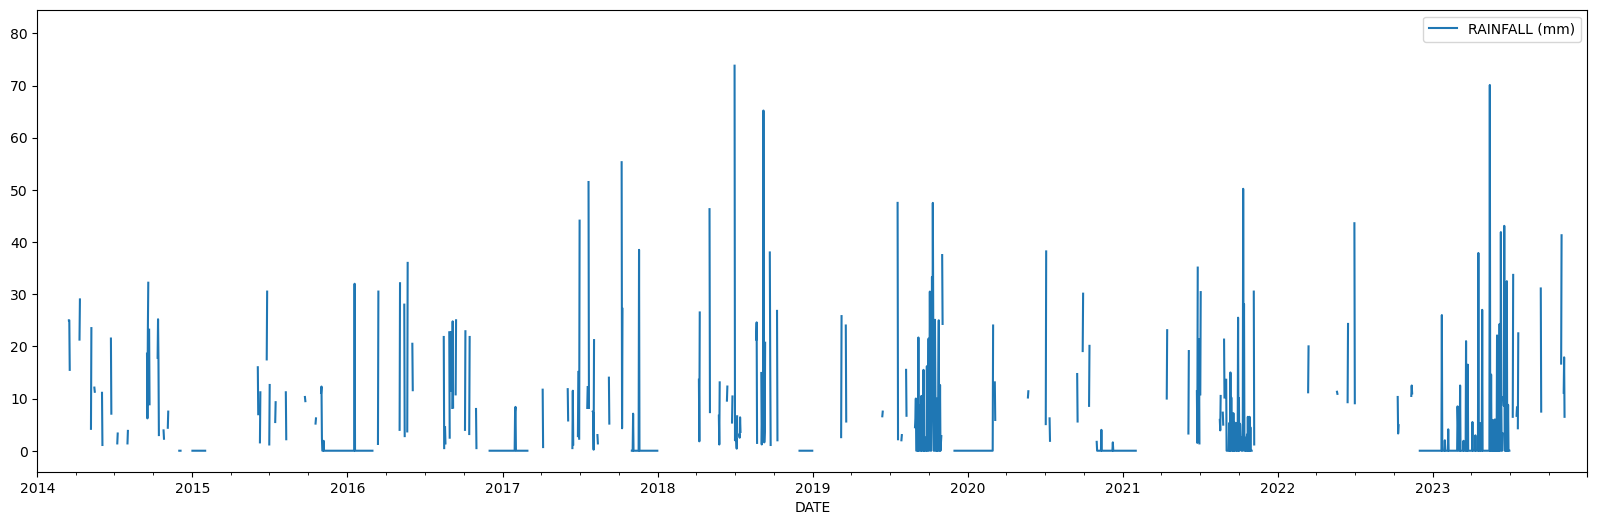

In [7]:
data['RAINFALL (mm)'] = pd.to_numeric(data['RAINFALL (mm)'], errors='coerce')
data.plot(x='DATE', y='RAINFALL (mm)', figsize=(20,6))


<Axes: xlabel='DATE'>

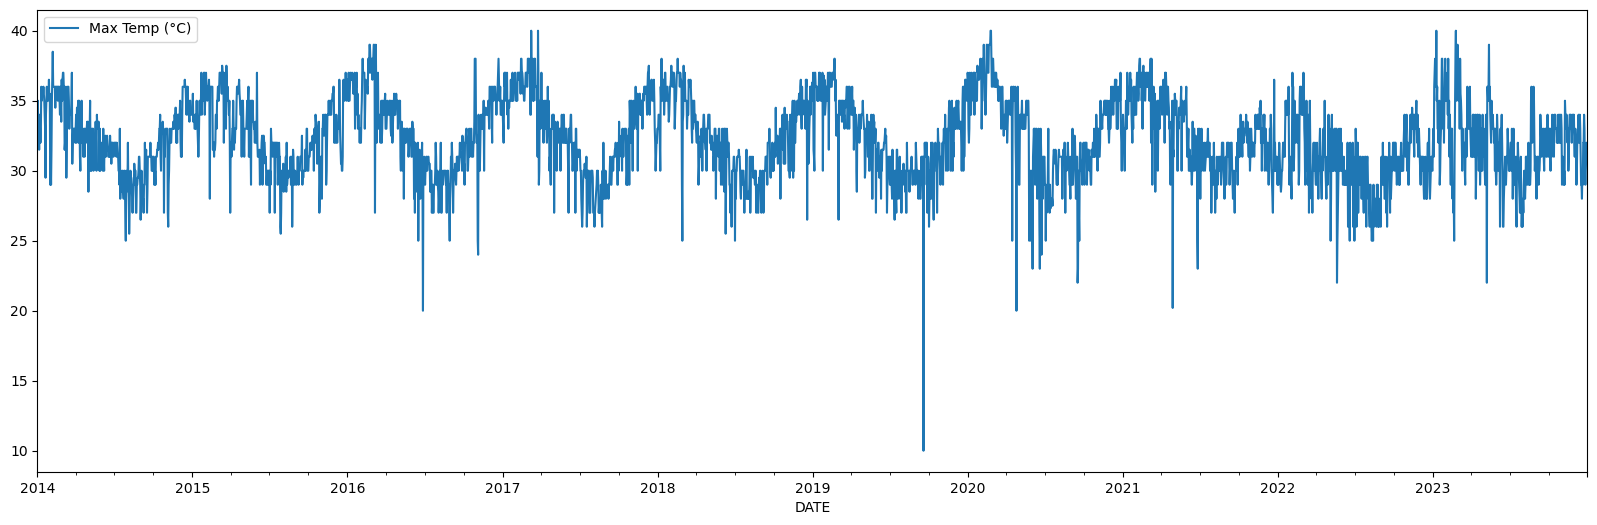

In [8]:
data['Max Temp (°C)'] = pd.to_numeric(data['Max Temp (°C)'], errors='coerce')
data.plot(x='DATE', y='Max Temp (°C)', figsize=(20,6))

<Axes: xlabel='DATE'>

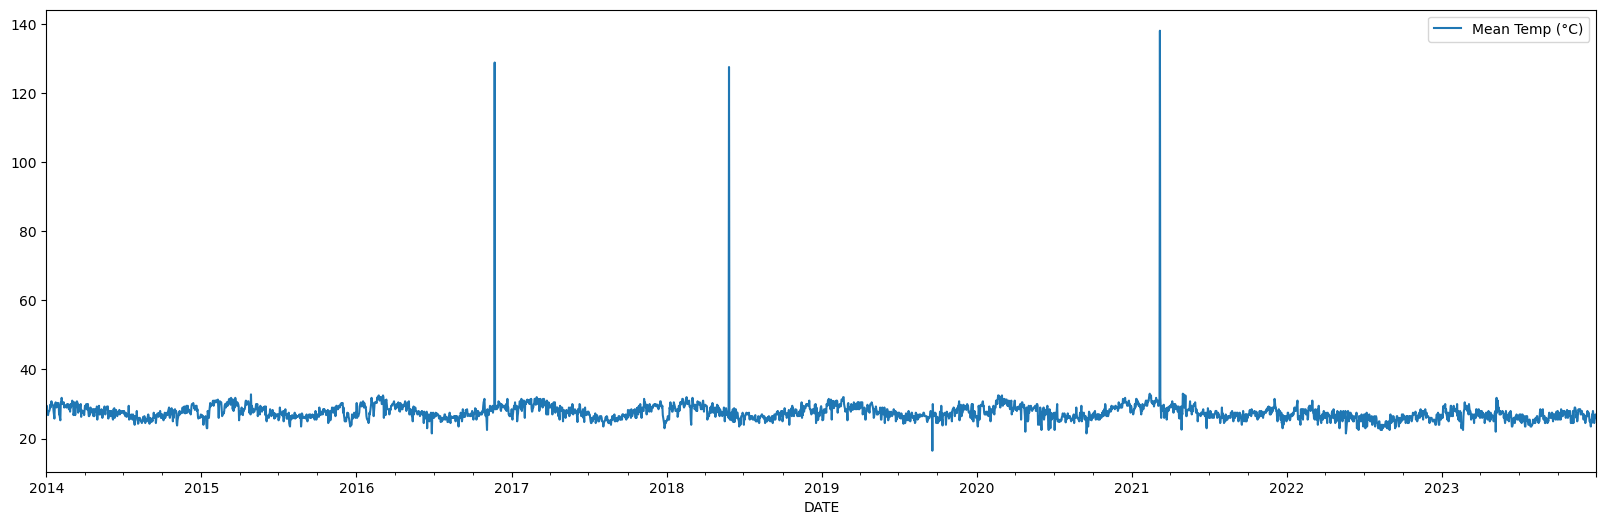

In [9]:
data['Mean Temp (°C)'] = pd.to_numeric(data['Mean Temp (°C)'], errors='coerce')
data.plot(x='DATE', y='Mean Temp (°C)', figsize=(20,6))

<Axes: xlabel='DATE'>

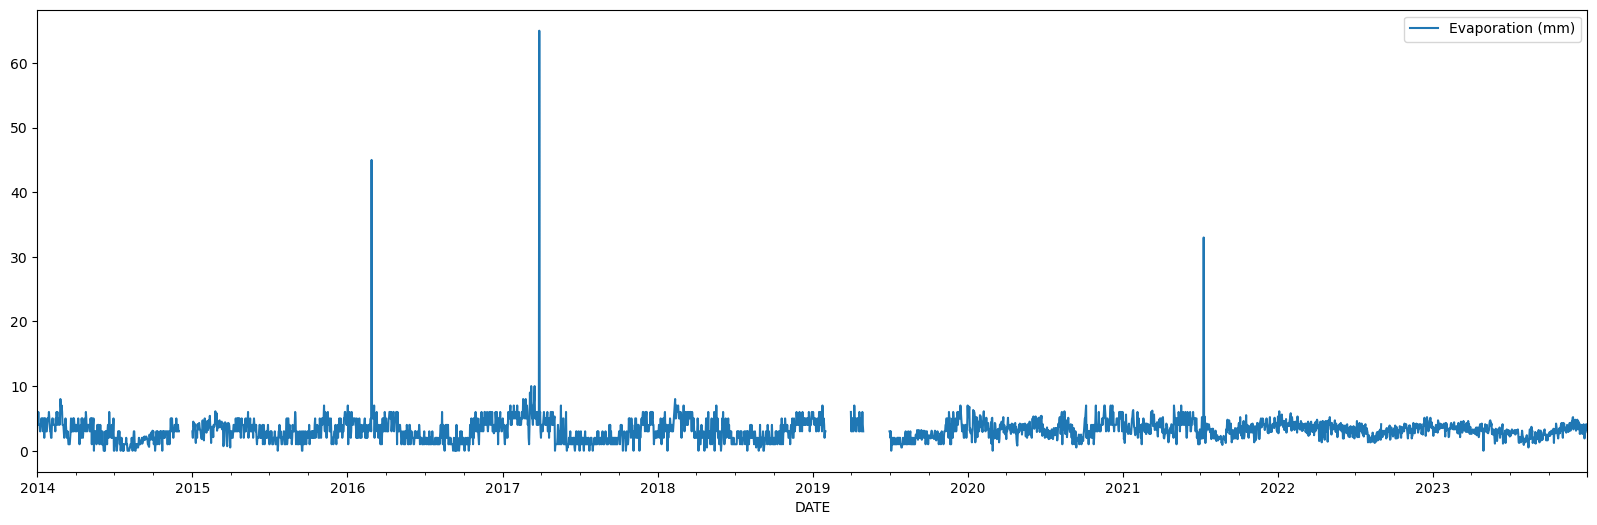

In [10]:
data['Evaporation (mm)'] = pd.to_numeric(data['Evaporation (mm)'], errors='coerce')
data.plot(x='DATE', y='Evaporation (mm)', figsize=(20,6))

In [11]:
#check data shape
(data.shape)

(3652, 11)

In [12]:
(data.columns)



Index(['DATE', 'RAINFALL (mm)', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Soil Temp @ 50cm (°C) ', 'Sunshine Hours',
       'Evaporation (mm)', 'year', 'month', 'day'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    3652 non-null   datetime64[ns]
 1   RAINFALL (mm)           1512 non-null   float64       
 2   Max Temp (°C)           3652 non-null   float64       
 3   Min Temp (°C)           3652 non-null   float64       
 4   Mean Temp (°C)          3652 non-null   float64       
 5   Soil Temp @ 50cm (°C)   2191 non-null   object        
 6   Sunshine Hours          3652 non-null   object        
 7   Evaporation (mm)        3500 non-null   float64       
 8   year                    3652 non-null   int32         
 9   month                   3652 non-null   int32         
 10  day                     3652 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(3), object(2)
memory usage: 271.2+ KB


In [14]:
#replaced missing values with 0 in RAINFALL (mm) column 
data['RAINFALL (mm)'] = data['RAINFALL (mm)'].fillna(0)

In [15]:
#check missing values
data.isna().sum()

DATE                         0
RAINFALL (mm)                0
Max Temp (°C)                0
Min Temp (°C)                0
Mean Temp (°C)               0
Soil Temp @ 50cm (°C)     1461
Sunshine Hours               0
Evaporation (mm)           152
year                         0
month                        0
day                          0
dtype: int64

In [16]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [17]:
#droppped this column for having more than 50% as missing values
data = data.drop('Soil Temp @ 50cm (°C) ', axis=1)


In [18]:
data

,DATE,RAINFALL (mm),Max Temp (°C),Min Temp (°C),Mean Temp (°C),Sunshine Hours,Evaporation (mm),year,month,day
0,2014-01-01,0.0,34.0,23.0,28.5,7.20,4.0,2014,1,1
1,2014-01-02,0.0,35.0,24.0,29.5,6.60,4.0,2014,1,2
2,2014-01-03,0.0,32.0,23.0,27.5,7.20,6.0,2014,1,3
3,2014-01-04,0.0,33.0,21.0,27.0,6.10,4.0,2014,1,4
4,2014-01-05,0.0,31.5,22.0,26.8,7.30,4.0,2014,1,5
...,...,...,...,...,...,...,...,...,...,...
3647,2023-12-27,0.0,30.0,21.0,25.5,4.20,3.4,2023,12,27
3648,2023-12-28,0.0,31.0,22.0,26.5,5.50,4.1,2023,12,28
3649,2023-12-29,0.0,32.0,22.0,27.0,5.70,3.8,2023,12,29
3650,2023-12-30,0.0,32.0,21.0,26.5,4.10,3.2,2023,12,30


In [19]:
# Calculate the median value for each month
median_per_month = data.groupby('month')['Evaporation (mm)'].median()

# Iterate over the rows of the dataframe
for index, row in data.iterrows():
    # Check if the value is missing
    if pd.isnull(row['Evaporation (mm)']):
        # Get the month of the current row
        month = row['month']
        # Fill in the missing value with the median value for that month
        data.at[index, 'Evaporation (mm)'] = median_per_month[month]

In [20]:
data

,DATE,RAINFALL (mm),Max Temp (°C),Min Temp (°C),Mean Temp (°C),Sunshine Hours,Evaporation (mm),year,month,day
0,2014-01-01,0.0,34.0,23.0,28.5,7.20,4.0,2014,1,1
1,2014-01-02,0.0,35.0,24.0,29.5,6.60,4.0,2014,1,2
2,2014-01-03,0.0,32.0,23.0,27.5,7.20,6.0,2014,1,3
3,2014-01-04,0.0,33.0,21.0,27.0,6.10,4.0,2014,1,4
4,2014-01-05,0.0,31.5,22.0,26.8,7.30,4.0,2014,1,5
...,...,...,...,...,...,...,...,...,...,...
3647,2023-12-27,0.0,30.0,21.0,25.5,4.20,3.4,2023,12,27
3648,2023-12-28,0.0,31.0,22.0,26.5,5.50,4.1,2023,12,28
3649,2023-12-29,0.0,32.0,22.0,27.0,5.70,3.8,2023,12,29
3650,2023-12-30,0.0,32.0,21.0,26.5,4.10,3.2,2023,12,30


In [22]:
#rechecked for missing values correctly dealt with
data.isna().sum()

DATE                0
RAINFALL (mm)       0
Max Temp (°C)       0
Min Temp (°C)       0
Mean Temp (°C)      0
Sunshine Hours      0
Evaporation (mm)    0
year                0
month               0
day                 0
dtype: int64